In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('spam.csv')

In [5]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5573, 2)

## 1.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5573 non-null   object
 1   sms     5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
encoder=LabelEncoder()

In [9]:
df['Class']=encoder.fit_transform(df['Class'])

In [11]:
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check for missing values
df.isnull().sum()

Class    0
sms      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicated
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5170, 2)

## 2.EDA

In [17]:
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['Class'].value_counts()

Class
0    4516
1     654
Name: count, dtype: int64

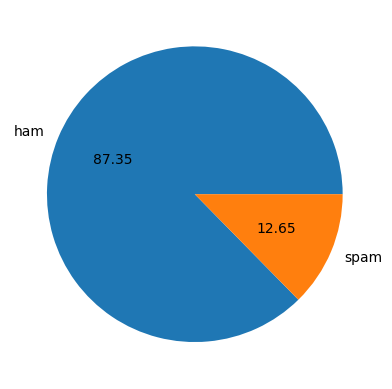

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalanced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#no of characters
df = df.assign(num_characters=df['sms'].apply(len))

In [24]:
df.head()

,Class,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#no of words
df['num_words']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Class,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#no of sentences
df['num_sentences']=df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Class,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5170.000000,5170.000000,5170.000000
mean,79.360542,18.596712,1.974468
std,58.443111,13.403425,1.459098
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#ham
df[df['Class']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['Class']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,654.000000,654.00000,654.000000
mean,137.741590,27.77370,2.987768
std,29.813646,6.99338,1.494196
min,13.000000,2.00000,1.000000
25%,132.000000,25.00000,2.000000
50%,148.000000,29.00000,3.000000
75%,157.000000,32.00000,4.000000
max,223.000000,46.00000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

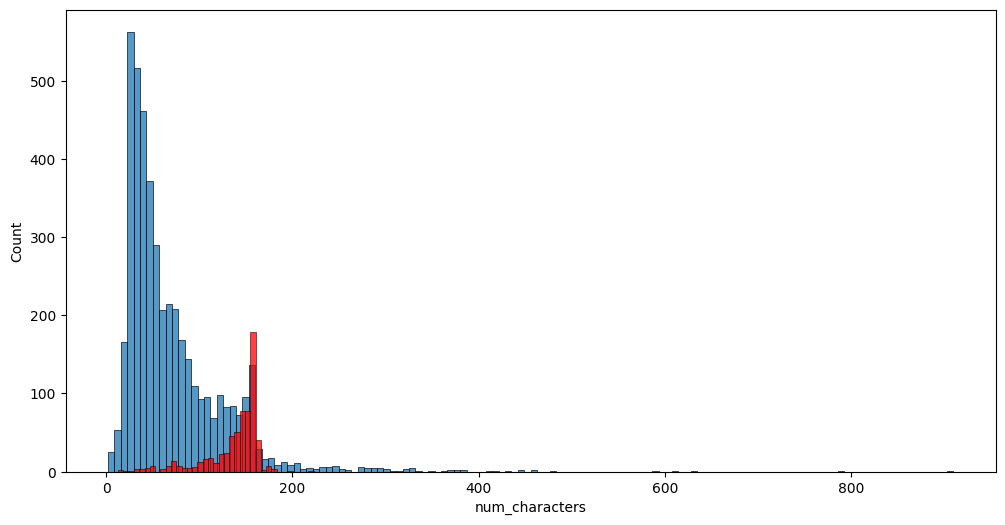

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==0]['num_characters'])
sns.histplot(df[df['Class']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

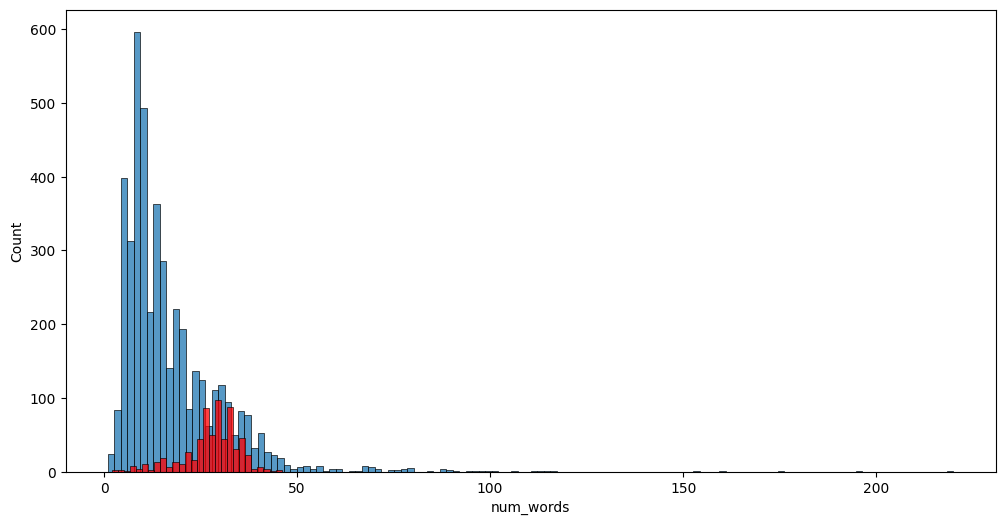

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==0]['num_words'])
sns.histplot(df[df['Class']==1]['num_words'],color='red')

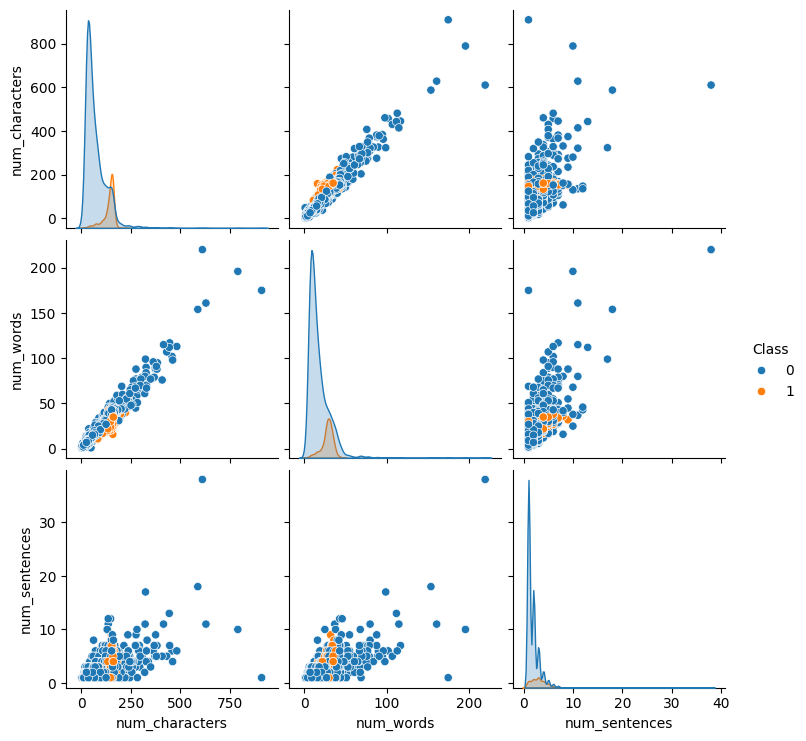

In [44]:
sns.pairplot(df,hue='Class')

<Axes: >

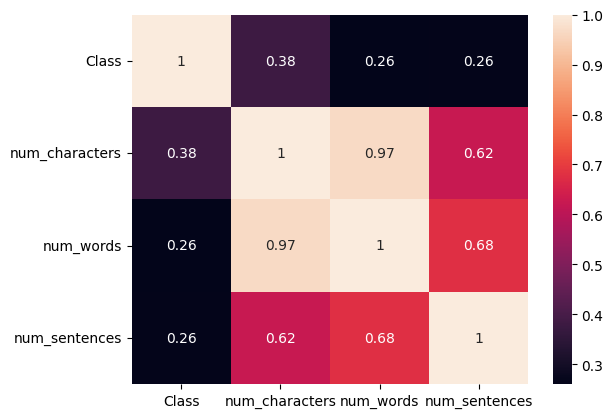

In [50]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

## 3.Data Preprocessing

In [85]:
def text_transform(sms):
    sms=sms.lower()
    sms=nltk.word_tokenize(sms)
    y=[]
    for i in sms:
        if i.isalnum():
            y.append(i)

    sms=y[:]
    y.clear()
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    sms=y[:]
    y.clear()
    for i in sms:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [84]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [99]:
df['transformed_text']=df['sms'].apply(text_transform)

In [100]:
df.head()

,Class,sms,num_characters,num_words,num_sentences,transformes_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [101]:
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from wordcloud import WordCloud

In [107]:
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [108]:
spam_wc=wc.generate(df[df['Class']==1]['transformed_text'].str.cat(sep=" "))

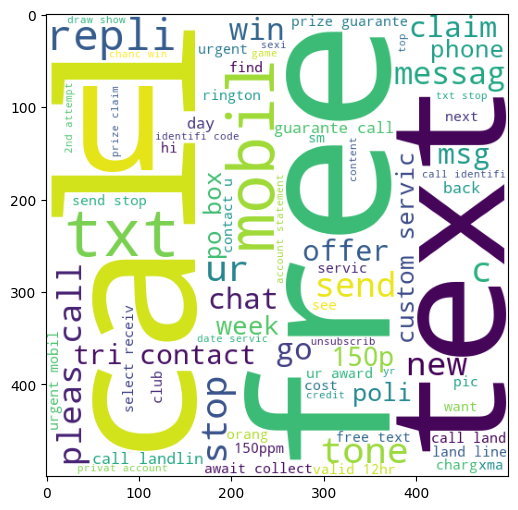

In [111]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [112]:
ham_wc=wc.generate(df[df['Class']==0]['transformed_text'].str.cat(sep=" "))

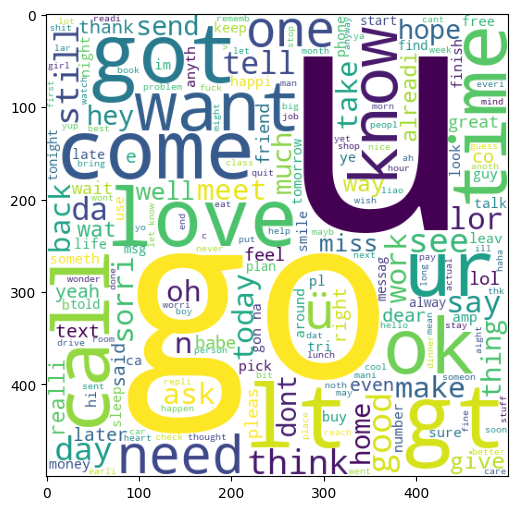

In [113]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [116]:
spam_corpus=[]
for msg in df[df['Class']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [117]:
len(spam_corpus)

9999

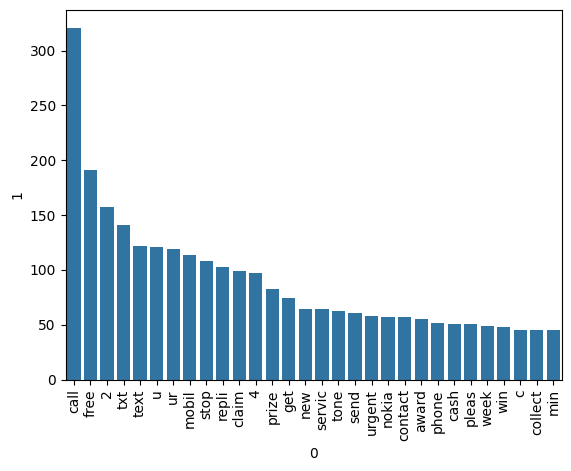

In [126]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()

In [129]:
ham_corpus=[]
for msg in df[df['Class']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [130]:
len(ham_corpus)

35939

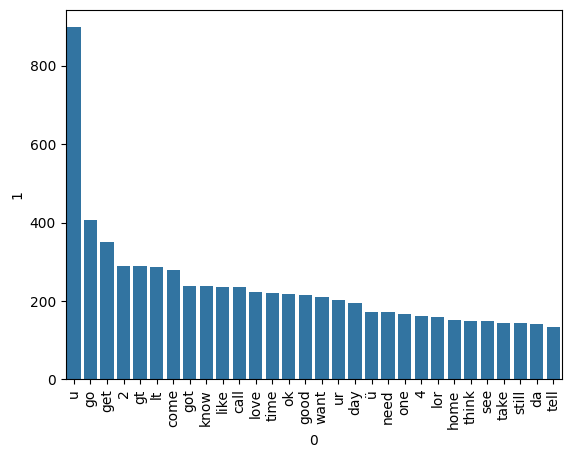

In [131]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building